In [26]:
from duneanalytics import DuneAnalytics
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima
from sklearn.model_selection import train_test_split
import tensorflow as tf
from datetime import datetime
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(30,10)})

import sys
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df_btc_usd = yf.download("BTC-USD")
df_btc_usd.shape
df_btc_usd.dtypes
df_btc_usd.columns
df_btc_usd.head()
df_btc_usd.index

df_btc_usd = df_btc_usd.asfreq('d')
pd.infer_freq(df_btc_usd.asfreq('d').index)


[*********************100%***********************]  1 of 1 completed


(2919, 6)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-09-04', '2022-09-05', '2022-09-06', '2022-09-07',
               '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11',
               '2022-09-12', '2022-09-14'],
              dtype='datetime64[ns]', name='Date', length=2919, freq=None)

'D'

In [3]:
# keep only CLose column
df_btc_usd = df_btc_usd['Close']
df_btc_usd = df_btc_usd[df_btc_usd.index > '2021-01-01']
df_btc_usd.shape


(621,)

<AxesSubplot:xlabel='Date'>

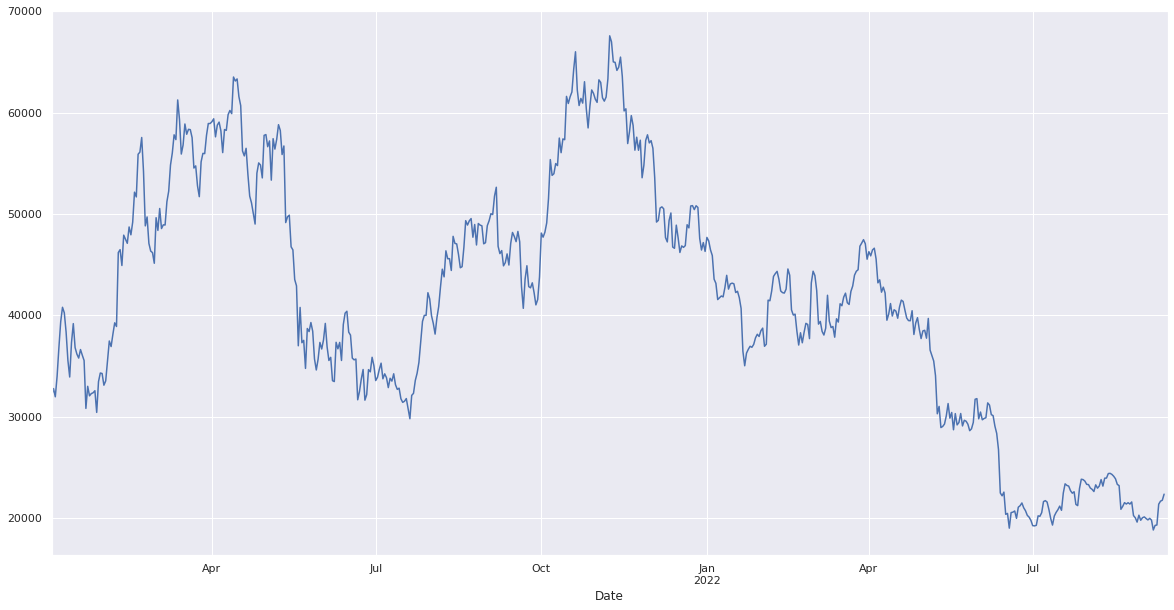

In [4]:
df_btc_usd.plot(figsize=(20, 10))

## ARIMA

In [5]:
f = Forecaster(y=df_btc_usd, current_dates=df_btc_usd.index)
f

Forecaster(
    DateStartActuals=2021-01-03T00:00:00.000000000
    DateEndActuals=2022-09-14T00:00:00.000000000
    Freq=D
    N_actuals=620
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

### Naive Approach

In [20]:
f.generate_future_dates(12)
f.set_test_length(.2)
f.set_estimator('arima')
f.manual_forecast(call_me='arima1')

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Test-Set Performance')

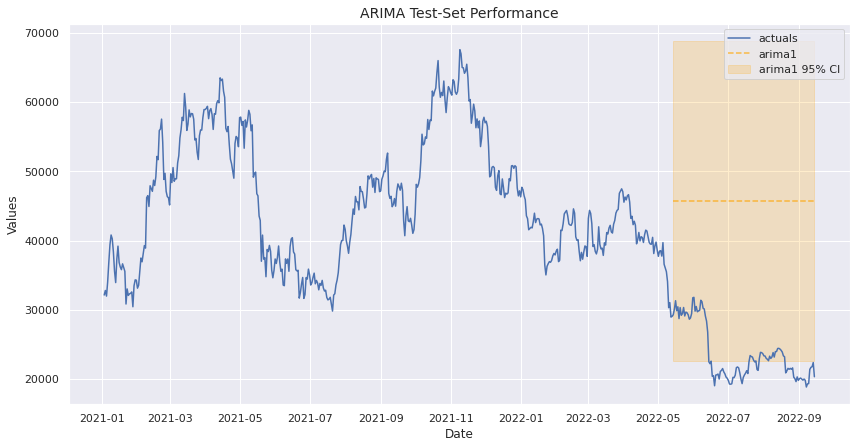

In [21]:
f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Forecast Performance')

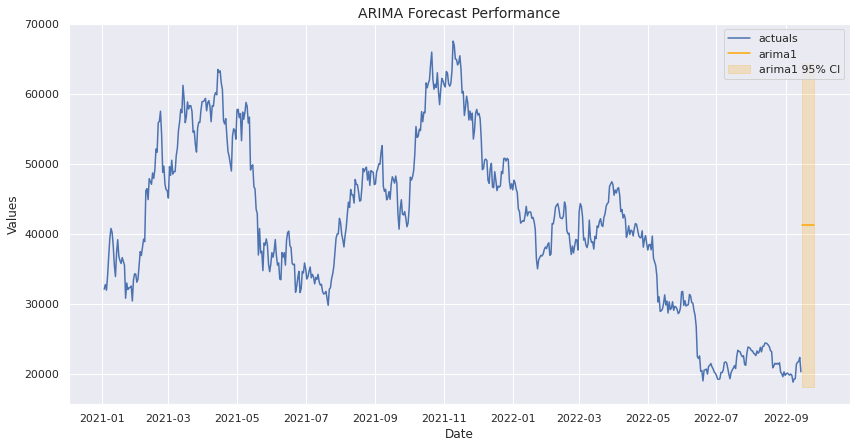

In [22]:
f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

### Human Interpretation - Iterative Approach

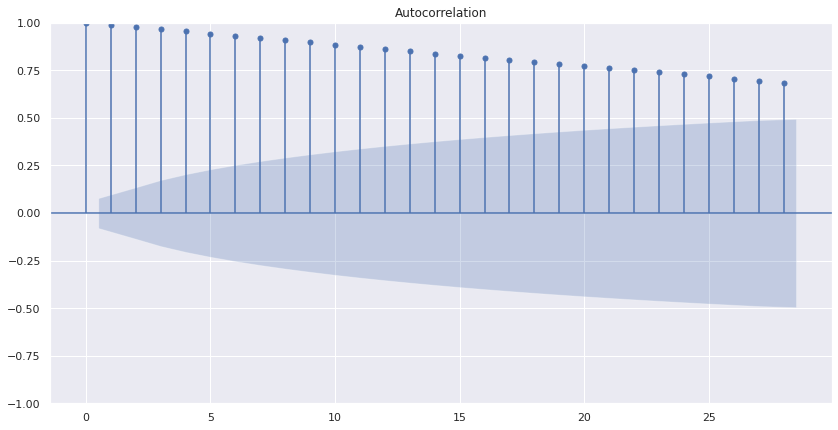

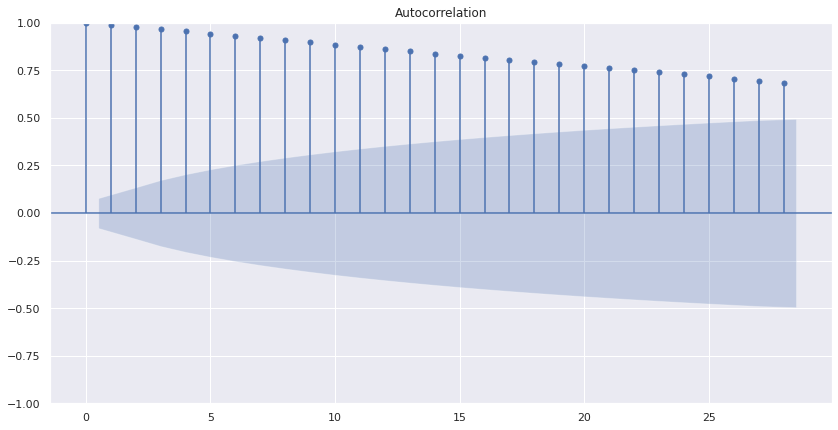

In [6]:
f.plot_acf()
plt.show()

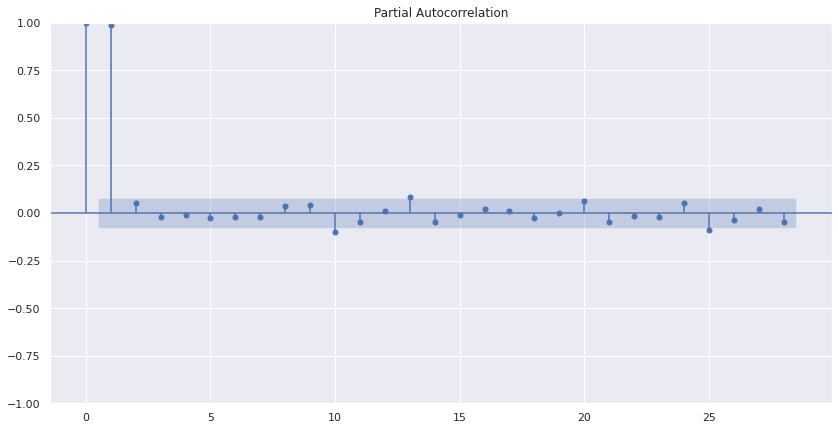

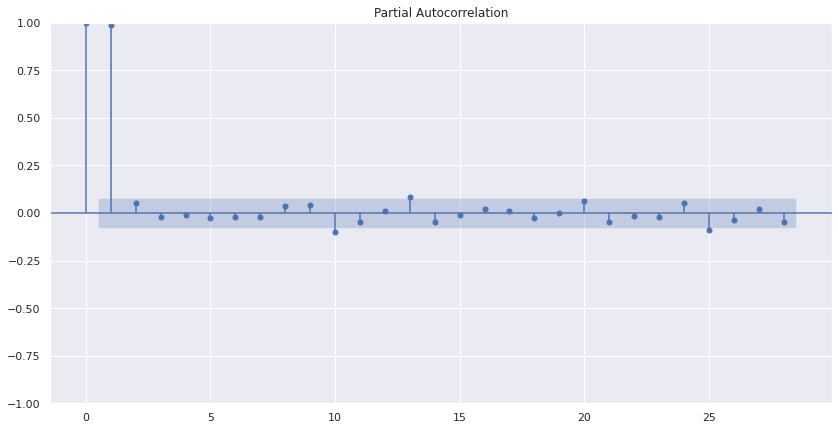

In [7]:
f.plot_pacf()
plt.show()

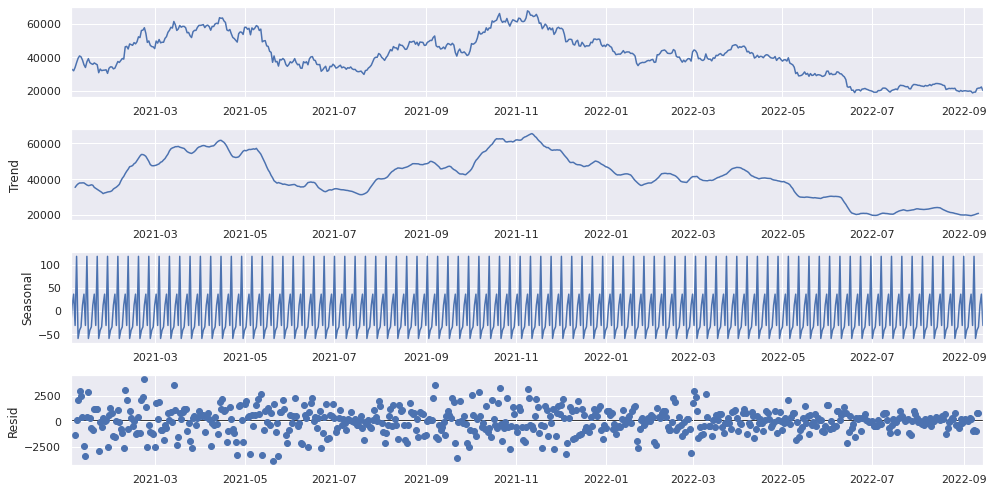

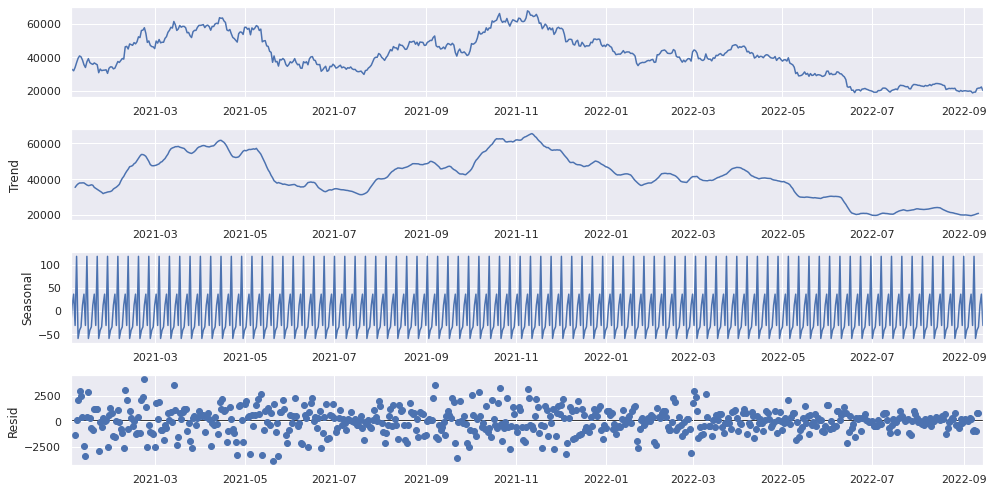

In [8]:
f.seasonal_decompose().plot()
plt.show()

In [37]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

-1.3294975650471685
0.6155714485139482


In [38]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima2')


<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Test-Set Performance')

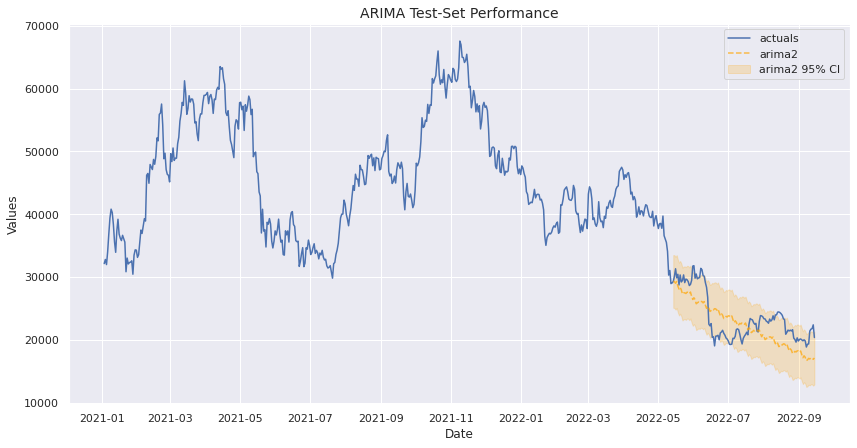

In [39]:
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Forecast Performance')

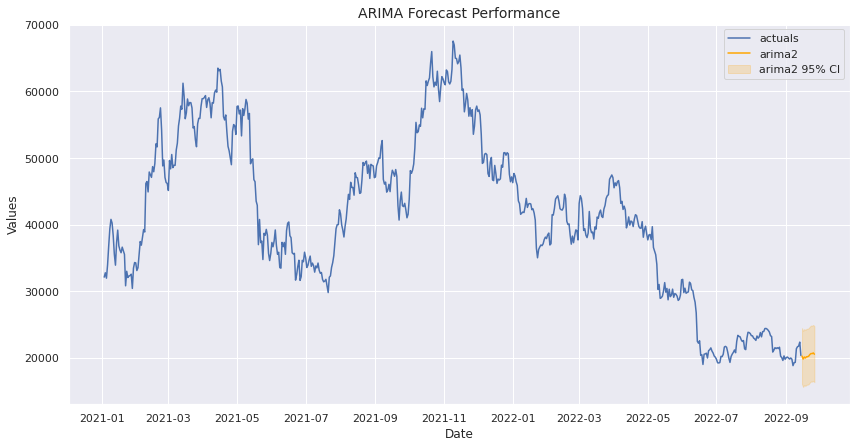

In [40]:
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [41]:
f.regr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  620
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -5417.701
Date:                          Wed, 14 Sep 2022   AIC                          10847.402
Time:                                  11:18:25   BIC                          10873.853
Sample:                                       0   HQIC                         10857.694
                                          - 620                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.915      1.093      0.274      -0.793       2.793
ma.L1         -1.0000      0.425     -2.353      0.019      -1.833      -0.167
ar.S.L12       0.1036      0.031      3.298      0.001       0.042       0.165
ar.S.L24       0.0670      0.023      2.934      0.003       0.022       0.112
ma.S.L12      -0.9988      0.635     -1.572      0.116      -2.244       0.246
sigma2      3.425e+06   1.43e-06    2.4e+12      0.000    3.43e+06    3.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):               272.99
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.87e+27. Standard errors may be unstable.
"""

### Auto ARIMA Approach

In [51]:
auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2,
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=8823.370, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8818.488, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8820.959, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8821.100, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8816.496, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=8819.231, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=8819.377, Time=0.13 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8817.730, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8820.221, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=8820.220, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=8822.213, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.579 seconds


<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Test-Set Performance')

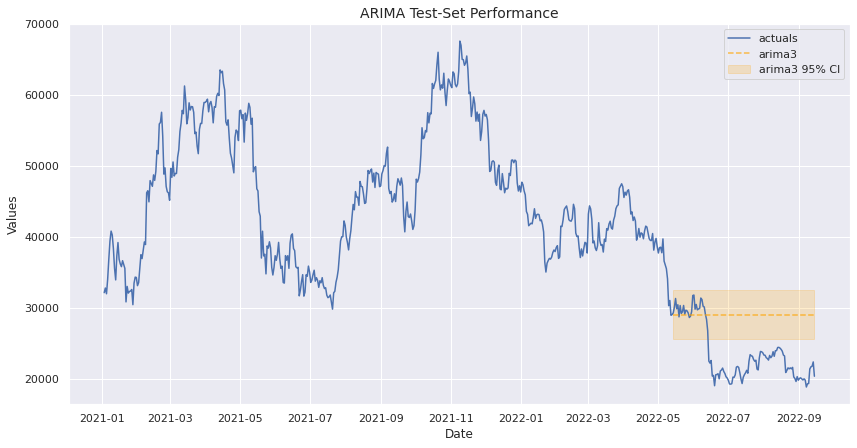

In [52]:
f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Forecast Performance')

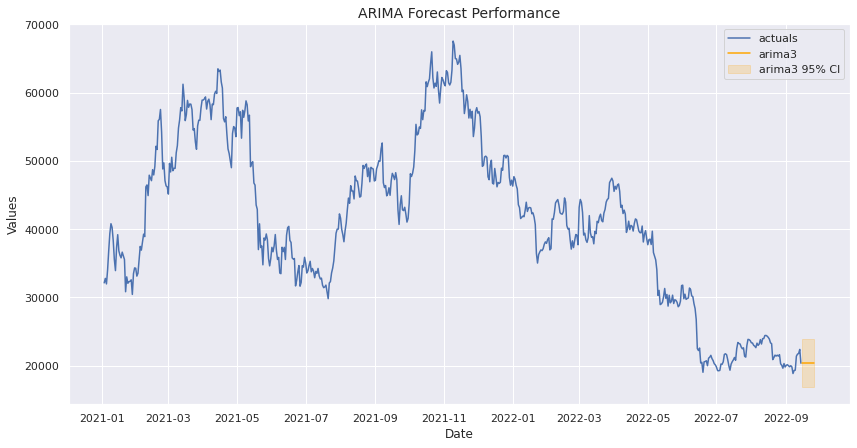

In [53]:
f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [54]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  620
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -5461.016
Date:                Wed, 14 Sep 2022   AIC                          10924.033
Time:                        11:19:41   BIC                          10928.461
Sample:                             0   HQIC                         10925.754
                                - 620                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       2.69e+06   1.05e+05     25.615      0.000    2.48e+06     2.9e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):               128.34
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## LSTM

In [10]:
f = Forecaster(y=df_btc_usd, current_dates=df_btc_usd.index)
f

Forecaster(
    DateStartActuals=2021-01-03T00:00:00.000000000
    DateEndActuals=2022-09-14T00:00:00.000000000
    Freq=D
    N_actuals=620
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'Orig Series')

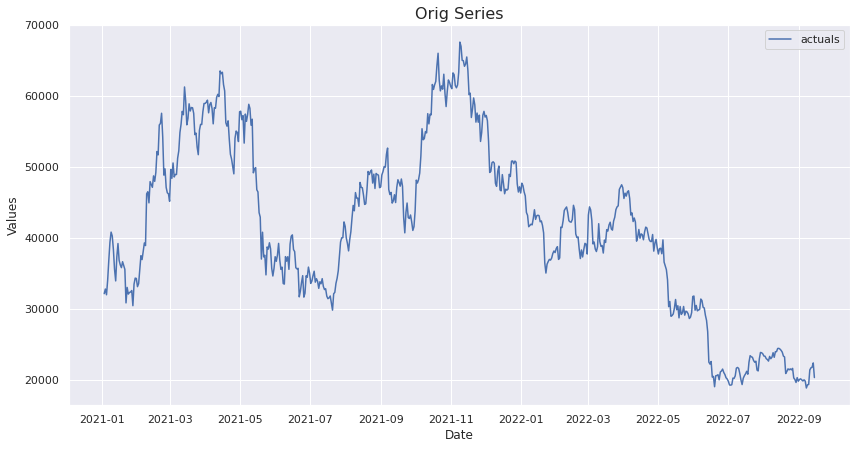

In [11]:
f.plot()
plt.title('Orig Series',size=16)
plt.show()

In [12]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: -1.33
the p-value is 0.6164
the series is not stationary
----------------------------------------------------------------------------------------------------


### Prepare Forecast for LSTM

In [13]:
f.set_test_length(12)
f.generate_future_dates(12)

### LSTM Model

In [14]:
f.set_estimator('lstm')
f.manual_forecast(call_me='lstm_default')

2022-09-14 15:14:59.249288: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-14 15:14:59.249314: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-14 15:14:59.249346: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rocketstation): /proc/driver/nvidia/version does not exist
2022-09-14 15:14:59.250961: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


19/19 [==============================] - 1s 2ms/step - loss: 0.4388


<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'Default Test-set Performance')

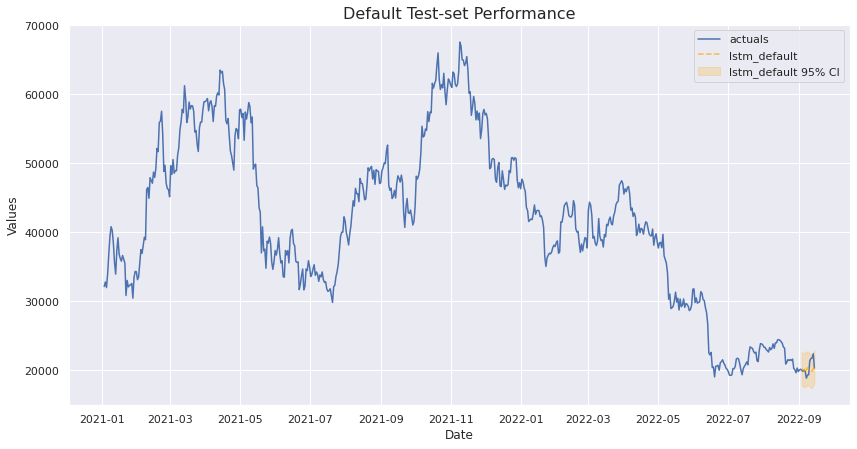

In [15]:
f.plot_test_set(ci=True)
plt.title('Default Test-set Performance',size=16)
plt.show()

In [16]:
f.manual_forecast(call_me='lstm_24lags',lags=24)

19/19 [==============================] - 1s 8ms/step - loss: 0.4384


<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'All Models Test-set Performance')

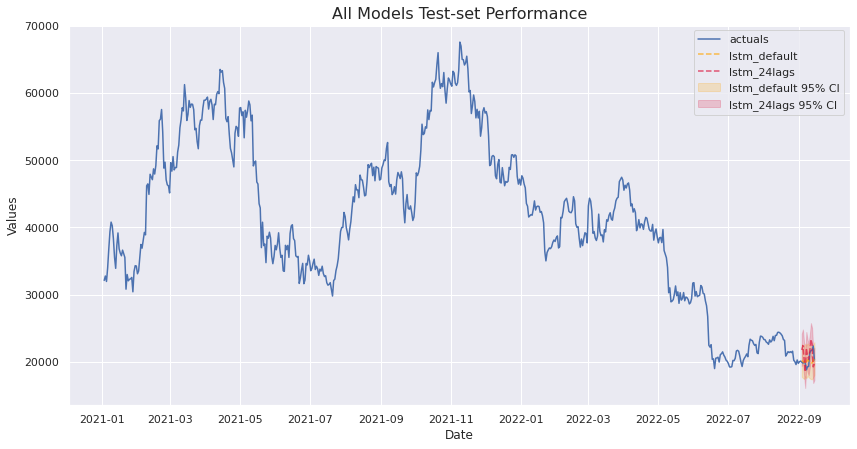

In [17]:
f.plot_test_set(ci=True)
plt.title('All Models Test-set Performance',size=16)
plt.show()

In [18]:
f.manual_forecast(call_me='lstm_24lags_5epochs',lags=24,epochs=5,validation_split=.2,shuffle=True)


Epoch 1/5
15/15 [==============================] - 1s 29ms/step - loss: 0.4145 - val_loss: 0.6396
Epoch 2/5
15/15 [==============================] - 0s 9ms/step - loss: 0.3835 - val_loss: 0.6006
Epoch 3/5
15/15 [==============================] - 0s 9ms/step - loss: 0.3518 - val_loss: 0.5519
Epoch 4/5
15/15 [==============================] - 0s 8ms/step - loss: 0.3116 - val_loss: 0.4788
Epoch 5/5
15/15 [==============================] - 0s 9ms/step - loss: 0.2646 - val_loss: 0.3899
Epoch 1/5
15/15 [==============================] - 1s 27ms/step - loss: 0.3909 - val_loss: 0.6047
Epoch 2/5
15/15 [==============================] - 0s 9ms/step - loss: 0.3475 - val_loss: 0.5379
Epoch 3/5
15/15 [==============================] - 0s 9ms/step - loss: 0.3030 - val_loss: 0.4695
Epoch 4/5
15/15 [==============================] - 0s 9ms/step - loss: 0.2617 - val_loss: 0.4083
Epoch 5/5
15/15 [==============================] - 0s 9ms/step - loss: 0.2194 - val_loss: 0.3387


<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'All Models Test-set Performance')

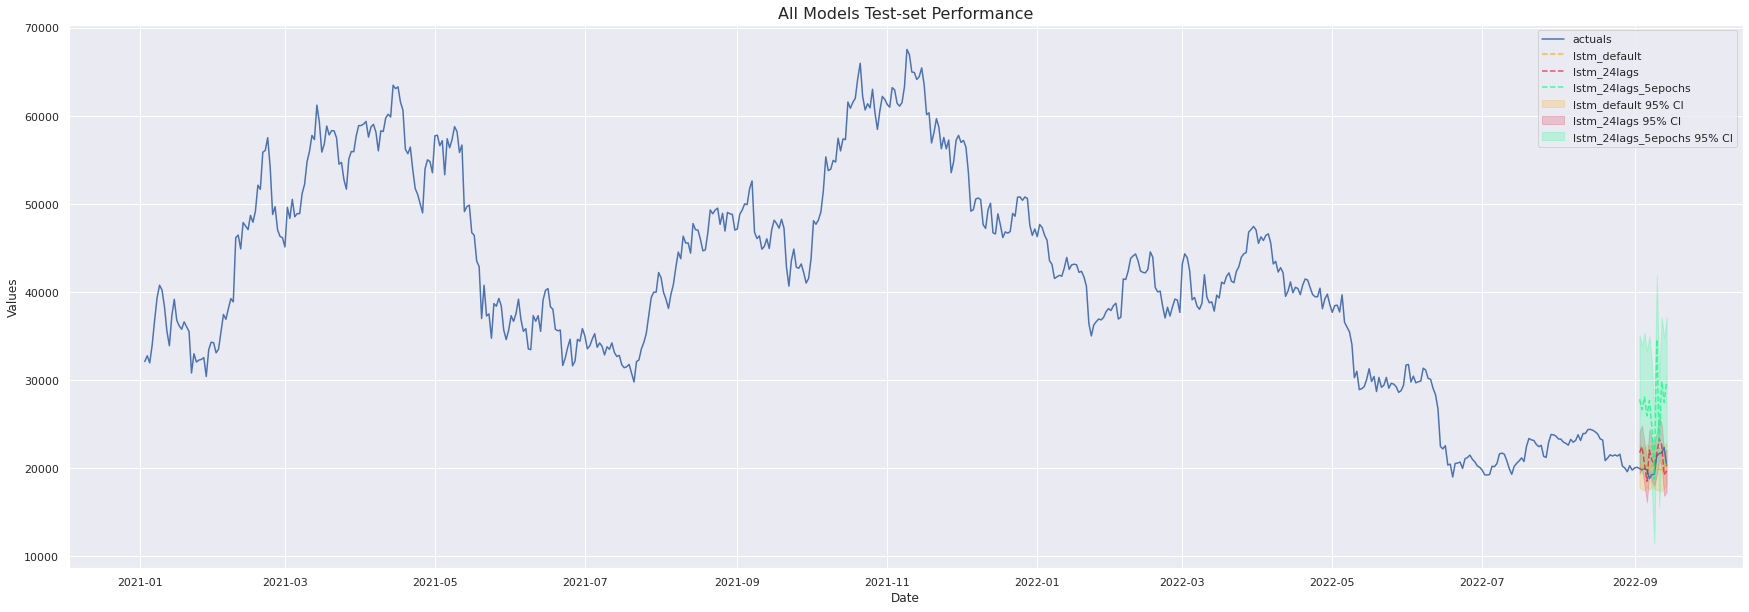

In [27]:
f.plot_test_set(ci=True)
plt.title('All Models Test-set Performance',size=16)
plt.show()

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))

Epoch 1/25
15/15 [==============================] - 3s 73ms/step - loss: 0.3877 - val_loss: 0.5427
Epoch 2/25
15/15 [==============================] - 0s 25ms/step - loss: 0.2773 - val_loss: 0.3497
Epoch 3/25
15/15 [==============================] - 0s 24ms/step - loss: 0.1865 - val_loss: 0.2440
Epoch 4/25
15/15 [==============================] - 0s 23ms/step - loss: 0.1228 - val_loss: 0.1759
Epoch 5/25
15/15 [==============================] - 0s 24ms/step - loss: 0.1007 - val_loss: 0.1486
Epoch 6/25
15/15 [==============================] - 0s 24ms/step - loss: 0.0947 - val_loss: 0.1440
Epoch 7/25
15/15 [==============================] - 0s 24ms/step - loss: 0.0927 - val_loss: 0.1300
Epoch 8/25
15/15 [==============================] - 0s 23ms/step - loss: 0.0891 - val_loss: 0.1512
Epoch 9/25
15/15 [==============================] - 0s 24ms/step - loss: 0.0848 - val_loss: 0.1542
Epoch 10/25
15/15 [==============================] - 0s 25ms/step - loss: 0.0824 - val_loss: 0.1377
Epoch 11/

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'All Models Test-Set Performance')

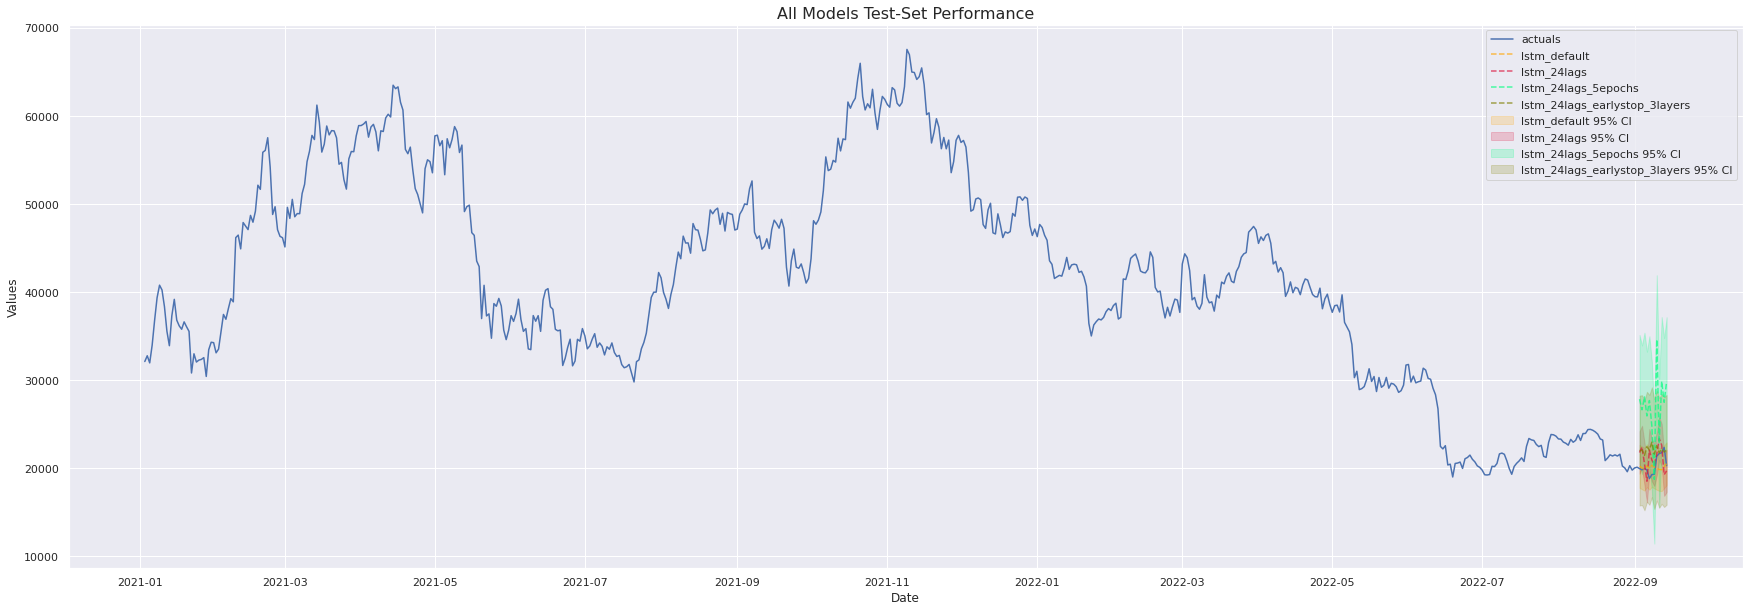

In [29]:
f.plot_test_set(ci=True)
plt.title('All Models Test-Set Performance',size=16)
plt.show()

Epoch 1/15
14/14 [==============================] - 5s 117ms/step - loss: 0.2418 - val_loss: 0.2287
Epoch 2/15
14/14 [==============================] - 1s 54ms/step - loss: 0.1210 - val_loss: 0.1769
Epoch 3/15
14/14 [==============================] - 1s 53ms/step - loss: 0.1006 - val_loss: 0.1716
Epoch 4/15
14/14 [==============================] - 1s 53ms/step - loss: 0.0944 - val_loss: 0.1686
Epoch 5/15
14/14 [==============================] - 1s 54ms/step - loss: 0.0854 - val_loss: 0.1342
Epoch 6/15
14/14 [==============================] - 1s 54ms/step - loss: 0.0850 - val_loss: 0.1323
Epoch 7/15
14/14 [==============================] - 1s 54ms/step - loss: 0.0768 - val_loss: 0.1275
Epoch 8/15
14/14 [==============================] - 1s 52ms/step - loss: 0.0761 - val_loss: 0.1288
Epoch 9/15
14/14 [==============================] - 1s 53ms/step - loss: 0.0745 - val_loss: 0.1520
Epoch 10/15
14/14 [==============================] - 1s 54ms/step - loss: 0.0784 - val_loss: 0.1323
Epoch 11

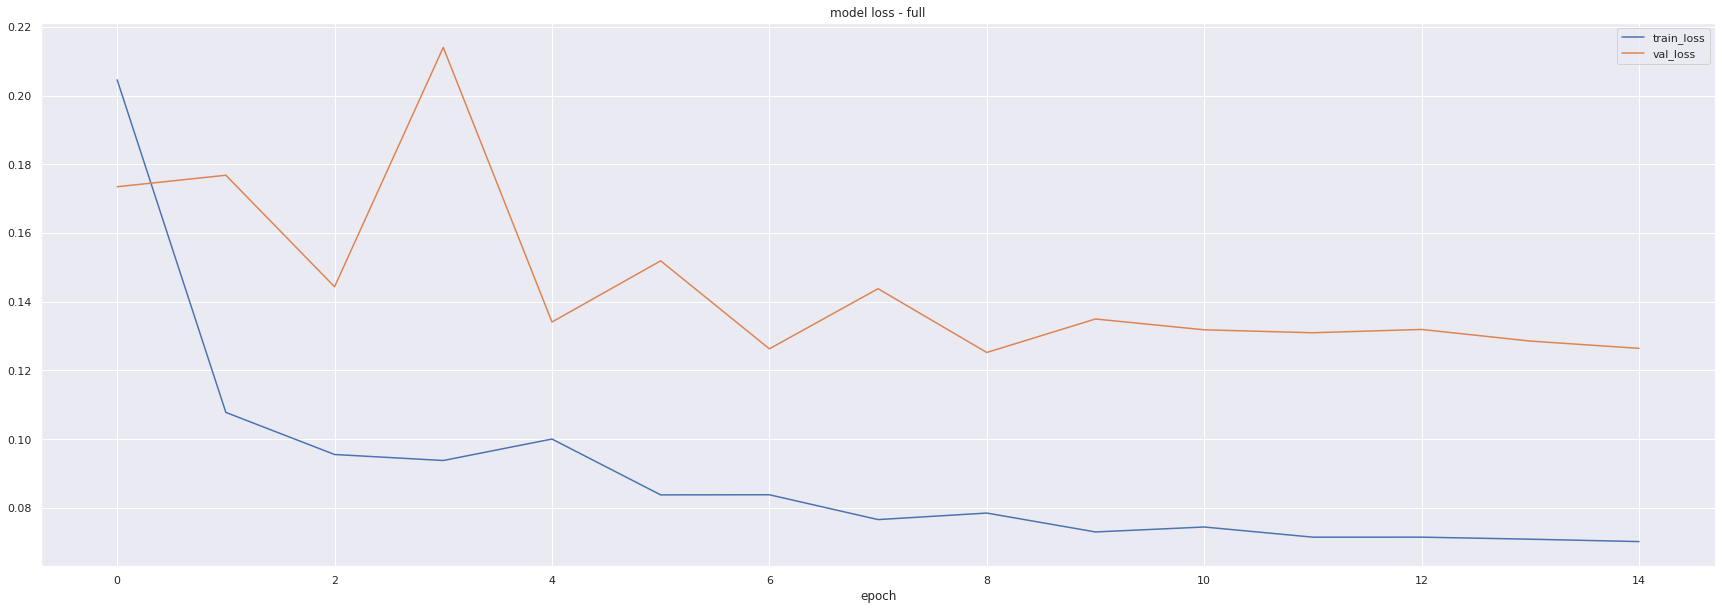

In [30]:
f.manual_forecast(call_me='lstm_24lags_4layers_15epochs',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, '24 Lags 4 Layers 15 Epochs Test-Set Performance')

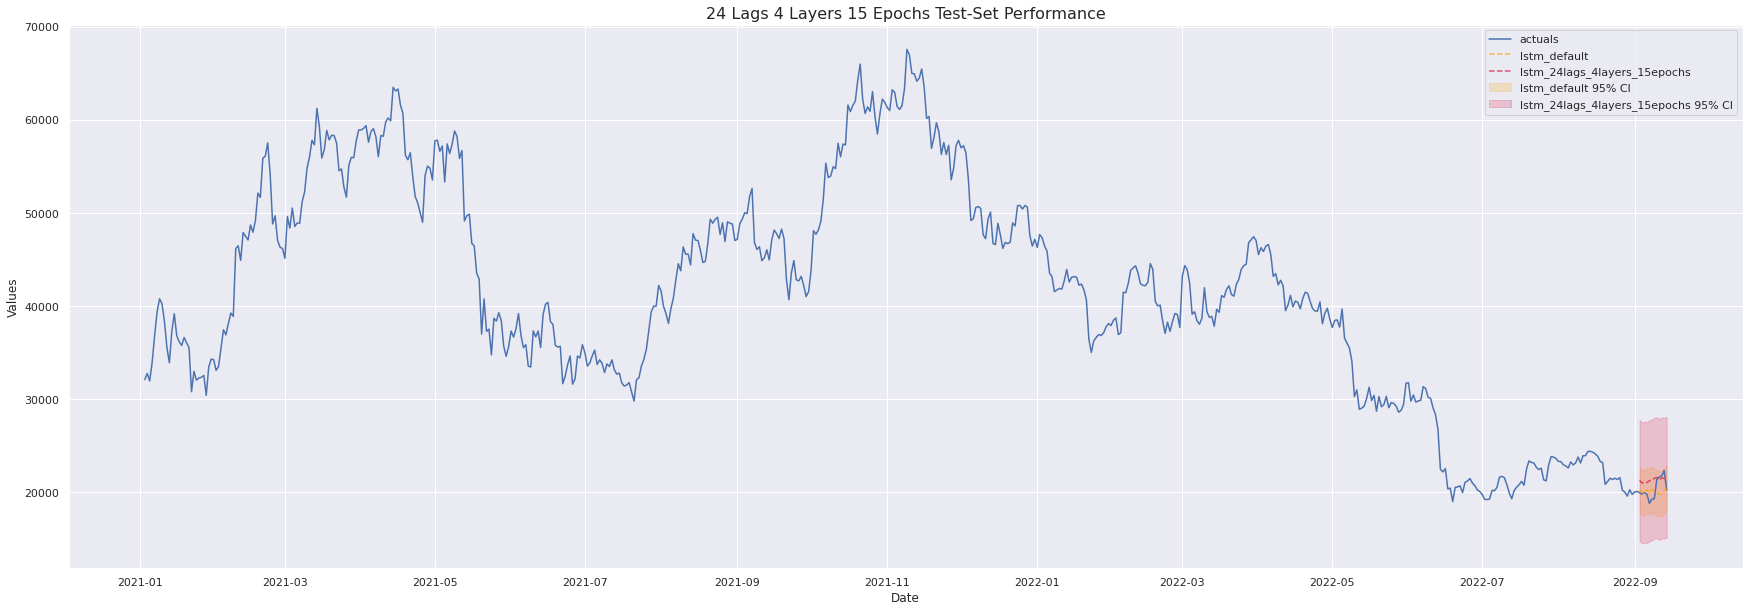

In [31]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
plt.title('24 Lags 4 Layers 15 Epochs Test-Set Performance',size=16)
plt.show()

In [ ]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=16,
                  epochs=300,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

Epoch 1/300
28/28 [==============================] - 19s 315ms/step - loss: 0.2336 - val_loss: 0.2796
Epoch 2/300
28/28 [==============================] - 6s 207ms/step - loss: 0.1489 - val_loss: 0.2588
Epoch 3/300
28/28 [==============================] - 6s 207ms/step - loss: 0.1456 - val_loss: 0.2121
Epoch 4/300
28/28 [==============================] - 6s 206ms/step - loss: 0.1407 - val_loss: 0.2645
Epoch 5/300
28/28 [==============================] - 6s 208ms/step - loss: 0.1424 - val_loss: 0.2224
Epoch 6/300
28/28 [==============================] - 6s 206ms/step - loss: 0.1387 - val_loss: 0.2489
Epoch 7/300
28/28 [==============================] - 6s 205ms/step - loss: 0.1458 - val_loss: 0.2802
Epoch 8/300
28/28 [==============================] - 6s 206ms/step - loss: 0.1391 - val_loss: 0.2786
Epoch 9/300
28/28 [==============================] - 6s 206ms/step - loss: 0.1434 - val_loss: 0.2534
Epoch 10/300
28/28 [==============================] - 6s 207ms/step - loss: 0.1346 - val_l

In [ ]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
plt.title('Top-2 Models Test-set Performance',size=16)
plt.show()